In [1]:
import numpy as np
import pandas as pd


In [25]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [26]:
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

In [7]:
U_file = 'Biomarkers_snpnet_PRSs.U.tsv.gz'
U_df = pd.read_csv(U_file, compression='gzip', sep='\t')

In [58]:
U = U_df.values[:, 1:]

In [11]:
U.shape

(337151, 20)

In [12]:
U_sq = U ** 2

In [15]:
U[:3, :3]

array([[-0.00142319, -0.00156492, -0.00214158],
       [ 0.0007894 ,  0.00037625,  0.001427  ],
       [ 0.0035422 , -0.00166577,  0.0006018 ]])

In [14]:
U_sq[:3, :3]

array([[2.02548110e-06, 2.44897651e-06, 4.58635459e-06],
       [6.23155156e-07, 1.41567661e-07, 2.03633658e-06],
       [1.25471704e-05, 2.77477993e-06, 3.62159493e-07]])

In [19]:
def compute_dist(ind_idx, components, U_sq = U_sq):
    return(np.sqrt(np.sum(U_sq[ind_idx, np.array(components)])))

In [33]:
dists_20 = [compute_dist(i, np.arange(20)) for i in range(U.shape[0])]

In [34]:
len(dists_20)

337151

(array([5.7000e+01, 1.4880e+03, 1.3016e+04, 4.8927e+04, 9.2379e+04,
        9.4484e+04, 5.7399e+04, 2.2009e+04, 5.9640e+03, 1.2100e+03,
        1.7100e+02, 2.9000e+01, 3.0000e+00, 7.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00284053, 0.00376141, 0.0046823 , 0.00560318, 0.00652406,
        0.00744495, 0.00836583, 0.00928672, 0.0102076 , 0.01112848,
        0.01204937, 0.01297025, 0.01389113, 0.01481202, 0.0157329 ,
        0.01665379, 0.01757467, 0.01849555, 0.01941644, 0.02033732,
        0.0212582 ]),
 <a list of 20 Patch objects>)

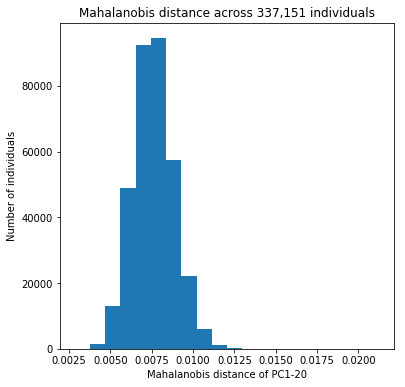

In [35]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
ax.set_title('Mahalanobis distance across 337,151 individuals')
ax.set_xlabel('Mahalanobis distance of PC1-20')
ax.set_ylabel('Number of individuals')
ax.hist(dists_20, bins=20)

In [95]:
GBE_names = pd.read_csv('GBE_names.tsv', sep='\t')

In [97]:
GBE_short_name_d = dict(zip(GBE_names['GBE_ID'], GBE_names['GBE_short_name']))

In [119]:
snpnet_df = pd.read_csv(
    'Biomarkers_snpnet_PRSs.tsv.gz', compression='gzip', sep='\t'
)

In [129]:
snpnet_factor=pd.DataFrame({
    'GBE_ID' : list(snpnet_df.columns)[1:],
    'mean' : list(snpnet_df.mean(skipna=True))[1:],
    'std' : list(snpnet_df.std(skipna=True))[1:]
})


In [152]:
snpnet_Z_df=pd.DataFrame(
    (snpnet_df.values[:, 1:] - np.array(list(snpnet_factor['mean']))) / np.array(list(snpnet_factor['std'])),
    columns = snpnet_df.columns[1:]
)
snpnet_Z_df['IID'] = snpnet_df['IID']

In [105]:
phe_df = pd.read_csv(
    'biomarkers.phe.gz', compression='gzip', sep='\t'
).replace(-9, np.nan)

In [115]:
phe_norm_factor=pd.DataFrame({
    'GBE_ID' : list(phe_df.columns)[2:],
    'mean' : list(phe_df.mean(skipna=True))[2:],
    'std' : list(phe_df.std(skipna=True))[2:]    
})


In [116]:
phe_norm_factor

,GBE_ID,mean,std
0,INI20030620,-1.021316e-17,0.999991
1,INI20030750,-1.731320e-17,0.999990
2,INI20030760,1.289460e-17,0.999990
3,INI40030700,-5.454199e-18,0.999991
4,INI20030600,5.087795e-18,0.999990
5,INI20030770,-6.749289e-18,0.999991
6,INI20030700,3.987116e-17,0.999991
7,INI10030510,-2.962342e-17,0.999990
8,INI20030710,-1.126970e-17,0.999991
9,INI10030500,-9.945564e-18,0.999972


In [66]:
dists_2_df = pd.DataFrame({
    'IIDs':    np.array([int(x) for x in U_df.values[:, 0]]),
    'dists_2': [compute_dist(i, np.arange(2)) for i in range(U.shape[0])]
})

In [71]:
dists_2_df.sort_values(by='dists_2', ascending=True).head(5)

,IIDs,dists_2
201450,4002452,0.000005
315326,5701221,0.000005
193455,3884043,0.000012
26275,1391810,0.000012
149970,3235419,0.000012


In [72]:
dists_2_df.sort_values(by='dists_2', ascending=False).head(5)

,IIDs,dists_2
14350,1214791,0.015615
70381,2050260,0.014568
264050,4938075,0.014106
141718,3113231,0.013838
17479,1261578,0.013090


In [153]:
def look_up_snpnet(iid, snpnet_df=snpnet_Z_df):
    res_df = pd.DataFrame({
        'GBE_ID': list(snpnet_df.columns)[1:], 
        'snpnet_PRS': snpnet_df[snpnet_df['IID'] == iid].values[:, 1:][0]
    })
    return(res_df)

In [154]:
def look_up_phe(iid, phe_df=phe_df):
    res_df = pd.DataFrame({
        'GBE_ID': list(phe_df.columns)[2:], 
        'Phenotype_value': phe_df[phe_df['IID'] == iid].values[:, 2:][0]
    })
    res_df['GBE_short_name'] = res_df['GBE_ID'].map(lambda x: GBE_short_name_d[x])
    return res_df

In [155]:
def look_up_phe_and_snpnet(iid):
    return look_up_phe(iid).merge(
        look_up_snpnet(iid), on='GBE_ID', how='left'
    )[['GBE_ID', 'Phenotype_value', 'snpnet_PRS', 'GBE_short_name']]

In [156]:
look_up_phe_and_snpnet(2050260) # top2

,GBE_ID,Phenotype_value,snpnet_PRS,GBE_short_name
0,INI20030620,1.185531,-1.865826,Alanine aminotransferase covariate and statin ...
1,INI20030750,0.688599,0.333251,Glycated haemoglobin (HbA1c) covariate and sta...
2,INI20030760,-1.586318,-0.345256,HDL cholesterol covariate and statin adjusted
3,INI40030700,-3.895437,-1.910592,EGFR covariate and statin adjusted
4,INI20030600,-1.757127,-0.561884,Albumin covariate and statin adjusted
5,INI20030770,3.078752,2.198683,IGF 1 covariate and statin adjusted
6,INI20030700,4.615533,16.959542,Creatinine covariate and statin adjusted
7,INI10030510,NaN,-0.613456,Creatinine (enzymatic) in urine covariate adju...
8,INI20030710,0.533623,-0.621428,C-reactive protein covariate and statin adjusted
9,INI10030500,NaN,-0.135605,Microalbumin in urine covariate adjusted


In [157]:
look_up_phe_and_snpnet(1214791) # top1

,GBE_ID,Phenotype_value,snpnet_PRS,GBE_short_name
0,INI20030620,-1.203372,-0.729605,Alanine aminotransferase covariate and statin ...
1,INI20030750,-1.070379,-0.818941,Glycated haemoglobin (HbA1c) covariate and sta...
2,INI20030760,-0.893583,0.318226,HDL cholesterol covariate and statin adjusted
3,INI40030700,-3.866146,-3.348134,EGFR covariate and statin adjusted
4,INI20030600,0.500407,0.664856,Albumin covariate and statin adjusted
5,INI20030770,2.642079,1.279796,IGF 1 covariate and statin adjusted
6,INI20030700,4.413011,19.261715,Creatinine covariate and statin adjusted
7,INI10030510,NaN,0.206407,Creatinine (enzymatic) in urine covariate adju...
8,INI20030710,1.464419,0.527943,C-reactive protein covariate and statin adjusted
9,INI10030500,NaN,1.288163,Microalbumin in urine covariate adjusted


,FID,IID,INI20030620,INI20030750,INI20030760,INI40030700,INI20030600,INI20030770,INI20030700,INI10030510,...,INI10030840,INI20030870,INI20030650,INI20030890,INI20030790,INI20030640,INI20030860,INI10030610,BIN10030800,INI20030630
0,-1.0,-1.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9.0
1,-2.0,-2.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9.0
2,-3.0,-3.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9.0
3,-4.0,-4.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9.0
4,-5.0,-5.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9.0


In [47]:
population = pd.DataFrame({
    'IID': [int(x) for x in U_df.values[:, 0]]
})

In [49]:
phe_df_WB = phe_df.merge(population, on='IID', how='right')

In [50]:
phe_df_WB.shape

(337151, 40)

In [52]:
phe_mat = phe_df_WB.values[:, 2:]

In [55]:
phe_mat

array([[ 0.06009377, -1.21625783,  0.75783168, ..., -0.15589455,
         2.        ,  0.01659155],
       [-0.16317435,  0.79151563,  0.34584146, ..., -1.65908025,
         1.        ,  0.60161687],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])